## COMO MELHORAR UM ALGORITMO COM GridSearchCV

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
import tensorflow as tf

from sklearn.model_selection import GridSearchCV
import math



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

### IMPORTANDO A BASE DE DADOS

In [43]:
url_csv = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'


In [44]:
hausing = pd.read_csv(url_csv)
hausing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [45]:
hausing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [107]:
# VERIFICANDO DADOS NULOS
hausing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cat              0
dtype: int64

In [111]:
# TRATANDO DADOS NULOS
df= hausing.dropna(subset=['total_bedrooms'])


In [113]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
income_cat            0
dtype: int64

(9.5, -0.5)

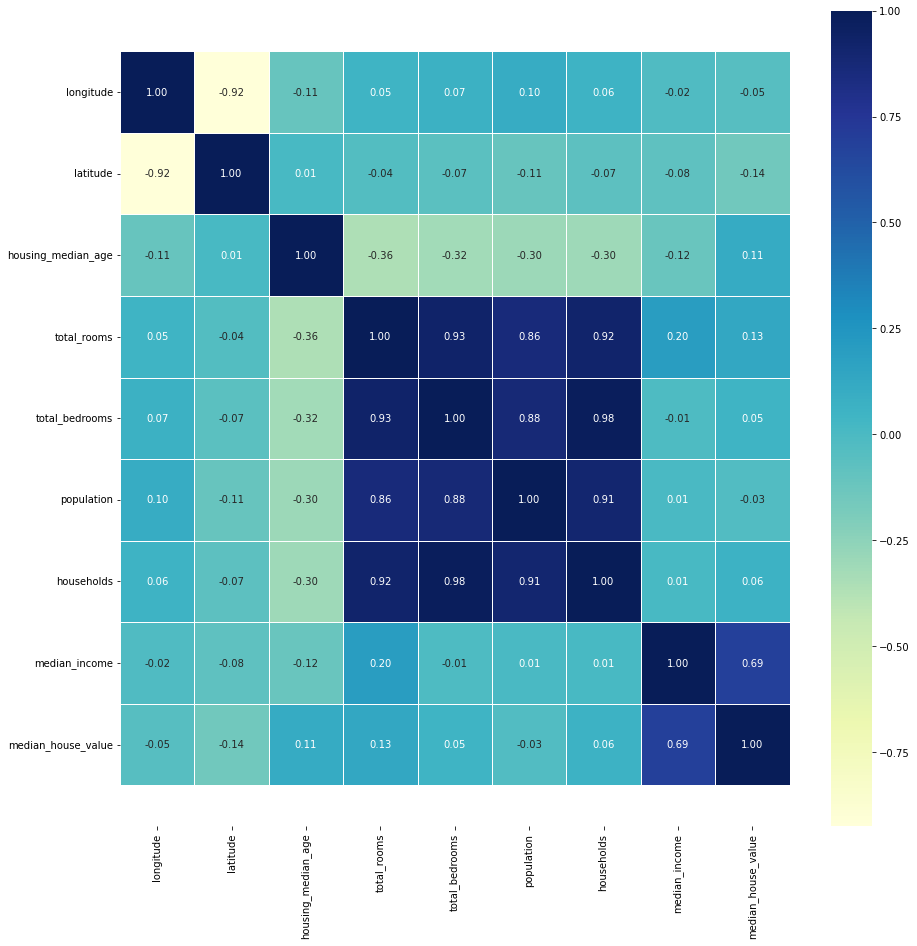

In [151]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

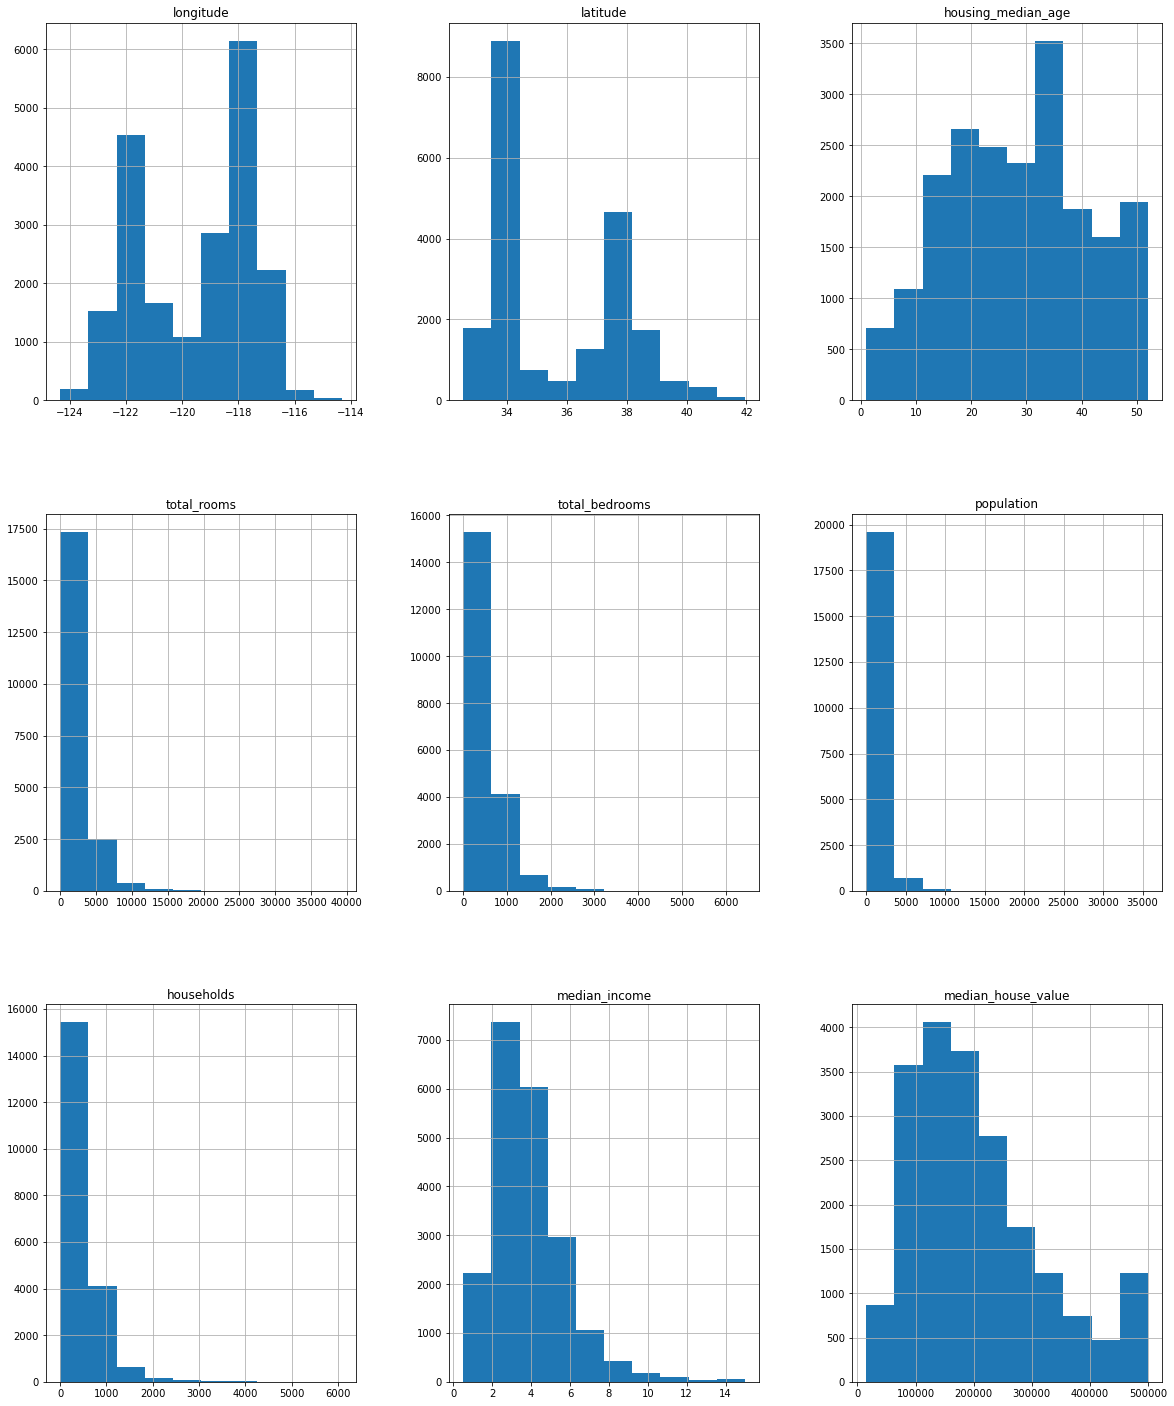

In [152]:
#df.hist(figsize = (15,5))
p = df.hist(figsize = (20,25))

In [115]:
# crianfo uma variavel categorica para a renda das pessoas
import numpy as np
df['income_cat'] = pd.cut(hausing["median_income"],bins=[0.,1.5,3.0,4.5,6., np.inf],
labels=[1,2,3,4,5])
hausing['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<AxesSubplot:>

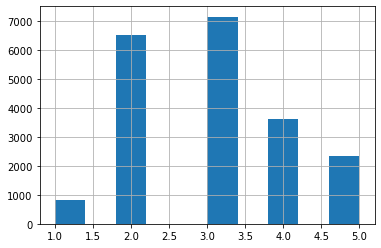

In [116]:
df['income_cat'].hist()

### Observaçoes do grafico acima 
- A renda maior das pessoas esta entre 2.0 e  3.5

In [117]:
df['income_cat'].value_counts(normalize=True)
## proporção de pessoas por categoria

3    0.350218
2    0.318847
4    0.176724
5    0.114374
1    0.039838
Name: income_cat, dtype: float64

In [119]:
train, test = train_test_split(hausing,
                              random_state=42,
                              test_size=0.2,
                             stratify=hausing['income_cat'] )

In [120]:
# podemos ver o conjunto de dados de treino e teste
train
#test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [121]:
hausing_train_set = df.drop('income_cat', axis=1)
hausing_test_set = df.drop('income_cat', axis=1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

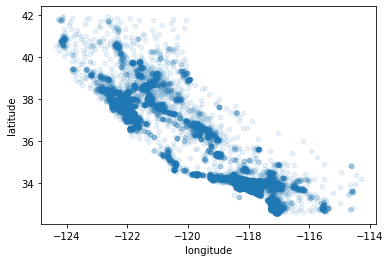

In [122]:
hausing_train_set.plot(kind='scatter',x = 'longitude',y='latitude', alpha= 0.1 )

In [123]:
a = df.drop( 'ocean_proximity',axis=1)
y = df['income_cat']


In [124]:
x =a.drop('income_cat',axis=1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=42)


# Logist Regression

In [127]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [128]:
lr_pred = lr.predict(x_test)
pd.DataFrame(np.c_[y_test,lr_pred],columns=['Actual','Predicted']).head(5)


,Actual,Predicted
0,3,3
1,3,3
2,3,2
3,2,3
4,3,3


 Test Accuracy score :  46.66 %
Train Accuracy score :  46.57 %
----------------------
Classification Report
----------------------


Text(24.0, 0.5, 'Predicted Values')

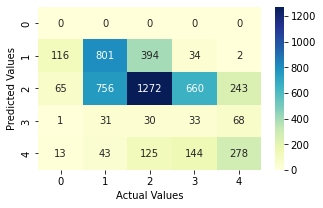

In [130]:
print(" Test Accuracy score : ",round(lr.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(lr.score(x_train,y_train)*100,2),"%")
print("----------------------")
print("Classification Report")
print("----------------------")
con = confusion_matrix(lr_pred,y_test)
plt.figure(figsize=(5,3))
sns.heatmap(con, annot=True,cmap="YlGnBu",fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
#print(classification_report(y_test,lr_pred))


## Otimizar Nosso Modelo

In [136]:

from sklearn.model_selection import GridSearchCV


In [133]:
rfc=RandomForestClassifier(random_state=42)

In [134]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [141]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [140]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [144]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [145]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)

In [149]:
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  1.0


In [148]:
print(" Test Accuracy score : ",round(rfc1.score(x_test,y_test)*100,2),"%")
print("Train Accuracy score : ",round(rfc1.score(x_train,y_train)*100,2),"%")

 Test Accuracy score :  100.0 %
Train Accuracy score :  100.0 %
